In [4]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load Dataset
df = pd.read_csv("adult.csv")

df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
# Check Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Handle Missing Values
# Adult dataset uses ? instead of NaN:
df.replace(" ?", np.nan, inplace=True)
df.dropna(inplace=True)

print(df.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [8]:
# Separate Categorical & Numerical Columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')
Numerical Columns: Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


In [9]:
# Label Encoding (Ordered Data)
# Apply to income column (Target Variable):
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])
df['income'].value_counts()


income
0    24720
1     7841
Name: count, dtype: int64

Now:
<=50K → 0
50K → 1

In [10]:
# One Hot Encoding (Nominal Features)
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,82,132870,9,0,4356,18,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,66,186061,10,0,4356,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,3900,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,3900,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


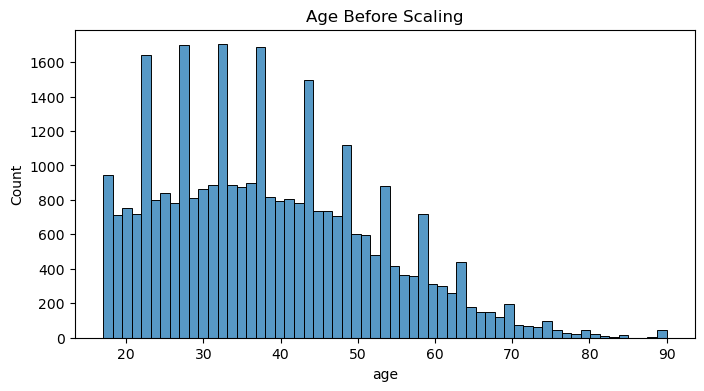

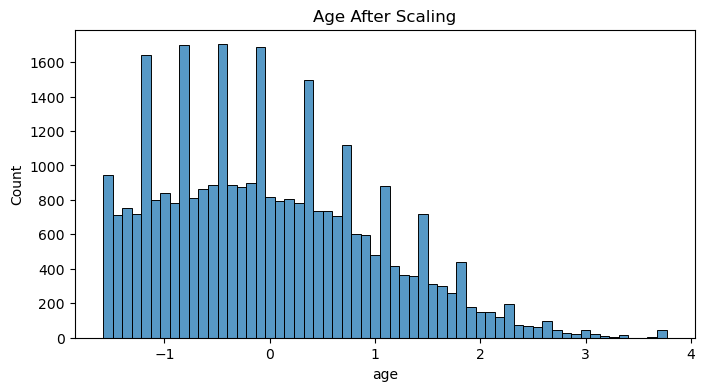

In [11]:
# Scaling Numerical Features (StandardScaler)
# Before Scaling (Visualization)
plt.figure(figsize=(8,4))
sns.histplot(df_encoded['age'])
plt.title("Age Before Scaling")
plt.show()

# Apply Scaling
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded.head()

# After Scaling (Visualization)
plt.figure(figsize=(8,4))
sns.histplot(df_encoded['age'])
plt.title("Age After Scaling")
plt.show()


In [12]:
# Save Final Processed Dataset
df_encoded.to_csv("adult_processed.csv", index=False)
print("Processed dataset saved successfully!")


Processed dataset saved successfully!


Model Readiness Comparison

BEFORE Processing:
-ML models cannot understand text
-Different feature scales cause bias
-Slower convergence

AFTER Processing:
-All numeric features
-Same scale
-Ready for ML models.


Scaling improves model performance by ensuring all features contribute equally.
Distance-based algorithms like KNN, SVM, Logistic Regression benefit greatly.
Without scaling, large values dominate predictions.
